## Simulation basics
### Steps
* Define possible outcomes for random variables
* Assign probabilities
* Define relationships between random variables
* Get multiple outcomes by repeated random sampling
* Analyze sample outcomes

Write a simulation for  a simple game of chance (e.g., drawing cards, rolling one or more dice, etc.)   Run the simulation 1000 times and interpret the outcome.  Post your code here, and discuss what might be done to improve it.

Now, it is time to generate the probabilities (recall that they are purely random).
They must sum up to 1 and in order to generate such numbers, we will use [dirichlet](https://en.wikipedia.org/wiki/Dirichlet_distribution) Distribution or multivariate beta distribution (MBD) where the unknown quantity $\alpha$ may be a parameter of the model or a latent variable rather than an observable variable.

### Throwing two fair dice

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
from numpy.random import default_rng
rng = default_rng()

probs_1, probs_2 = rng.dirichlet(np.ones(6),size=2)

sides = np.arange(1,7)


* argument_1 = alpha (vector of ones with length = 8)
* argument_2 = size ( generate x number of probabilities)
* dice = 2 then, size = 2


### Simulation

we will generate 1k games in which both dice are rolled 100 times.

### Law of large numbers
According to this law, a large number of repetitions of the experiment will yield the results close to the expected outcome

In [63]:
die_1_rolls = np.random.choice(sides,
                               size= (1000, 100),
                               p= probs_1)

In [64]:
# from numpy.random import randint as U
die_2_rolls = np.random.choice(sides,
                               size= (1000, 100),
                               p= probs_2)


size = The size argument will give us an array with 1k rows (games) and 100 columns (rolls).

We now know how to implement the first two steps of a simulation. Now let's implement the next step -
defining the relationship between random variables.


### Scores
We roll every die 100 times because the least score we can get is 1, assuming we want to score 100 points
After “playing” 1k games we need to calculate the scores for each game
sum everything up, do it column-wise (from left to right) - axis = 1


In [65]:
die_1_results = die_1_rolls.cumsum(axis=1)
die_2_results = die_2_rolls.cumsum(axis=1)

In [66]:
die_1_won_game_at = np.argmax(die_1_results >= 100, axis=1)
die_2_won_game_at = np.argmax(die_2_results >= 100, axis=1)

In [67]:
die_1_win_count = np.sum(die_1_won_game_at < die_2_won_game_at)
die_2_win_count = np.sum(die_2_won_game_at < die_1_won_game_at)
tie_game_count = np.sum(die_1_won_game_at == die_2_won_game_at)

### Visualize

In [80]:
print("Die 1 won {} times". format(die_1_win_count))
print("Die 2 won {} times". format(die_2_win_count))
print("Tie games {}". format(tie_game_count))

Die 1 won 10 times
Die 2 won 979 times
Tie games 11


### Data Frame

In [124]:
df = pd.DataFrame(die_1_rolls)
df = df.cumsum(axis=1)

In [ ]:
# df['sum_of_row'] = df.sum(axis=1)
# df['cumsum_row'] = df['sum_of_row'].cumsum()
# df.head()

In [128]:
df['won_game_at'] = df.idxmax(axis=0)
df['won_game_at'] >= 100
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,won_game_at
0,1,4,9,12,15,20,26,29,30,33,...,307,312,318,321,326,329,330,335,338,4.0
1,3,6,7,12,17,22,25,28,31,34,...,283,288,293,298,303,304,307,310,313,236.0
2,3,8,9,10,13,14,15,20,23,28,...,304,307,313,319,323,326,331,334,335,236.0
3,5,10,15,20,21,26,27,32,37,42,...,315,318,319,320,325,326,329,332,333,236.0
4,6,9,12,15,18,21,22,25,28,31,...,290,295,298,299,304,307,308,313,316,90.0


### Win Frequency - die_1_won_game_at

<AxesSubplot:ylabel='Frequency'>

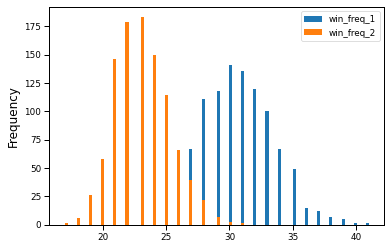

In [130]:
won_df = pd.DataFrame()
won_df['win_freq_1'] = die_1_won_game_at
won_df['win_freq_2'] = die_2_won_game_at
won_df.plot.hist(bins=100)


<AxesSubplot:ylabel='Density'>

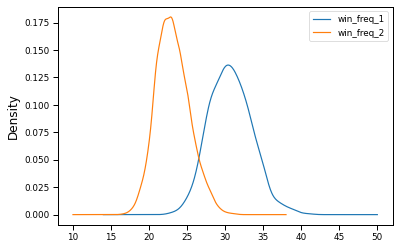

In [131]:
won_df.plot.kde()

In [132]:
won_df.quantile(probs_1)

,win_freq_1,win_freq_2
0.231292,29.0,21.000000
0.006590,25.0,18.583418
0.450088,30.0,23.000000
0.017896,25.0,19.000000
0.233444,29.0,21.000000
0.060690,27.0,20.000000


In [133]:
( won_df['win_freq_1'] >= 100).astype(int).mean()

0.0

ValueError: The following variable cannot be assigned with wide-form data: `hue`

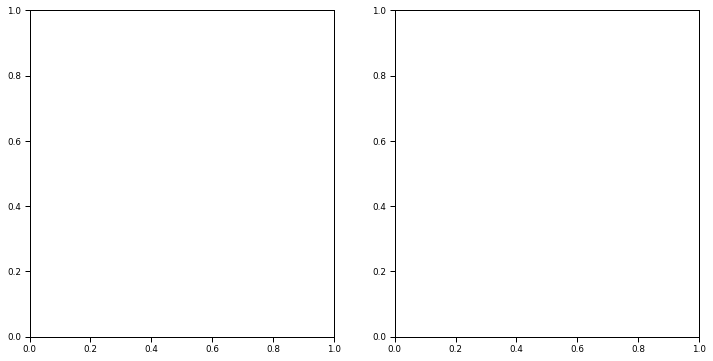

In [77]:
# # Distribution Plots
# f, (ax, ax1) = plt.subplots(1,2, figsize = (12,6))
# sns.set_context("paper",
#                 rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":12})
#
# ax = sns.displot(die_1_won_game_at, color="green",
#                  kind="kde", hue = die_1_won_game_at[:], fill=True)
#
# ax1 = sns.displot(die_2_won_game_at, color="green",
#                  kind="kde", hue= die_2_won_game_at[:], fill=True)
#
# ax1.set_axis_labels("Roll Count")
#
# plt.xlabel("Roll Count")
# plt.show()